In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("Dataset/data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)

In [6]:
data.diagnosis = [1 if each == 'M' else 0 for each in data.diagnosis]

In [7]:
data.diagnosis = [1 if each == 'M' else 0 for each in data.diagnosis]

In [8]:
y = data.diagnosis.values 
x_data = data.drop(["diagnosis"],axis=1)

In [9]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))


In [10]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.004229,0.002440,0.028867,0.235308,0.000028,0.000065,0.000071,0.000035,0.000057,0.000019,...,0.005966,0.004074,0.043394,0.474612,0.000038,0.000156,0.000167,0.000062,0.000108,0.000028
1,0.004835,0.004177,0.031241,0.311707,0.000020,0.000018,0.000020,0.000016,0.000043,0.000013,...,0.005874,0.005503,0.037330,0.459803,0.000029,0.000044,0.000057,0.000044,0.000065,0.000021
2,0.004629,0.004995,0.030559,0.282793,0.000026,0.000038,0.000046,0.000030,0.000049,0.000014,...,0.005541,0.006001,0.035849,0.401740,0.000034,0.000100,0.000106,0.000057,0.000085,0.000021
3,0.002685,0.004791,0.018237,0.090762,0.000033,0.000067,0.000057,0.000025,0.000061,0.000023,...,0.003505,0.006229,0.023242,0.133451,0.000049,0.000204,0.000161,0.000061,0.000156,0.000041
4,0.004770,0.003371,0.031758,0.304890,0.000024,0.000031,0.000047,0.000025,0.000043,0.000014,...,0.005299,0.003919,0.035778,0.370240,0.000032,0.000048,0.000094,0.000038,0.000056,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.005068,0.005263,0.033380,0.347673,0.000026,0.000027,0.000057,0.000033,0.000041,0.000013,...,0.005983,0.006206,0.039046,0.476493,0.000033,0.000050,0.000097,0.000052,0.000048,0.000017
565,0.004732,0.006641,0.030842,0.296427,0.000023,0.000024,0.000034,0.000023,0.000041,0.000013,...,0.005569,0.008992,0.036436,0.406911,0.000027,0.000045,0.000076,0.000038,0.000060,0.000016
566,0.003902,0.006601,0.025458,0.201716,0.000020,0.000024,0.000022,0.000012,0.000037,0.000013,...,0.004462,0.008021,0.029784,0.264222,0.000027,0.000073,0.000080,0.000033,0.000052,0.000018
567,0.004843,0.006895,0.032934,0.297367,0.000028,0.000065,0.000083,0.000036,0.000056,0.000016,...,0.006051,0.009267,0.043394,0.428068,0.000039,0.000204,0.000221,0.000062,0.000096,0.000029


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.20,random_state=42)

In [12]:
x_train = x_train.T
x_train.shape

(30, 455)

In [13]:
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [14]:
print(x_test.shape)

(30, 114)


In [15]:
y_train.shape

(455,)

In [16]:
y_test.shape

(114,)

In [17]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b=0.0
    return w,b

In [18]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [19]:
sigmoid(0)

np.float64(0.5)

In [20]:
def forward_backward_propagation(w,b,x_train,y_train):

    # forward propagation
    z = np.dot(w.T,x_train) + b 
    y_head = sigmoid(z) 
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) 
    cost = (np.sum(loss))/x_train.shape[1]   

    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]  
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]              
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}

    return cost,gradients

In [21]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion): 
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train) 
        cost_list.append(cost) 
        w = w - learning_rate * gradients["derivative_weight"]  
        b = b - learning_rate * gradients["derivative_bias"]   
        if i % 10 == 0:
            cost_list2.append(cost) 
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

    parameters = {"weight": w,"bias": b} 
    plt.plot(index,cost_list2) 
    plt.xticks(index,rotation='vertical') 
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list 

In [22]:
def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b) 
    Y_prediction = np.zeros((1,x_test.shape[1])) #(1,114) 
    
    for i in range(z.shape[1]): 
        if z[0,i]<= 0.5: 
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
                        
    return Y_prediction

Cost after iteration 0: 0.695327
Cost after iteration 10: 0.028389
Cost after iteration 20: 0.014851
Cost after iteration 30: 0.010074
Cost after iteration 40: 0.007628
Cost after iteration 50: 0.006139
Cost after iteration 60: 0.005137
Cost after iteration 70: 0.004417
Cost after iteration 80: 0.003874
Cost after iteration 90: 0.003451
Cost after iteration 100: 0.003111
Cost after iteration 110: 0.002832
Cost after iteration 120: 0.002599
Cost after iteration 130: 0.002401
Cost after iteration 140: 0.002231
Cost after iteration 150: 0.002084
Cost after iteration 160: 0.001955
Cost after iteration 170: 0.001841
Cost after iteration 180: 0.001740
Cost after iteration 190: 0.001649
Cost after iteration 200: 0.001568
Cost after iteration 210: 0.001494
Cost after iteration 220: 0.001426
Cost after iteration 230: 0.001365
Cost after iteration 240: 0.001308
Cost after iteration 250: 0.001256
Cost after iteration 260: 0.001208
Cost after iteration 270: 0.001164
Cost after iteration 280: 0.001

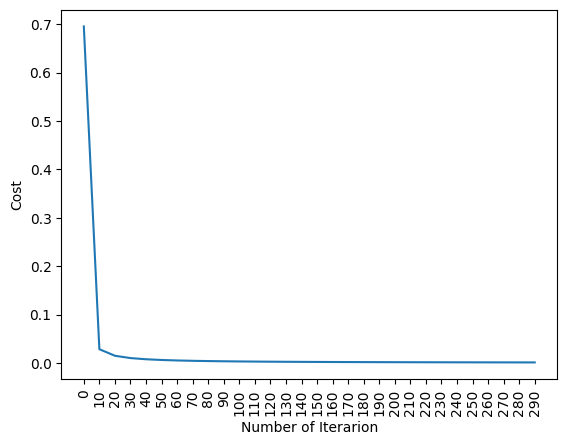

test accuracy: 100.0 %


In [23]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    dimension =  x_train.shape[0]  
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
   
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 3, num_iterations = 300)